In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lsst.daf.persistence as dafPersist
from pfs.lam.opdb import *
from pfs.lam.analysisPlot import *
import pandas as pd
import os
import re

In [3]:
experimentId = 125
cam = "b2"
rerun = "defocus" #"dcb2"

peaklist = "../SM2-defocus/Imqual_LAM_peaklist_DCB2-notfinal.csv"

In [4]:
peaklist = os.environ['LAM_SPS_ANALYSIS_DIR']+"/notebooks/devel/fmadec/SM2-defocus/Imqual_LAM_peaklist_DCB2-notfinal.csv"


In [5]:
visitStart, visitEnd = getVisitRange(experimentId)
print(visitStart, visitEnd)

23797 23816


In [6]:
drpPath = "/drp"
repo = "sps"
basePath = '/drp/analysis/sm2/'
arm = cam[0]


In [7]:
visit = int(visitStart)

In [8]:
print(f"{drpPath}/{repo}/rerun/{rerun}/detrend/")

butler = dafPersist.Butler(f"{drpPath}/{repo}/rerun/{rerun}/detrend/")
rbutler = dafPersist.Butler(f"{drpPath}/{repo}/")
rbutler.getKeys('raw')
lamps = rbutler.queryMetadata('raw', ['lamps'], visit=visit, arm=arm) 
print(f"lamps used: {lamps}")
calExp = butler.get("calexp", visit=visit, arm=cam[0])

/drp/sps/rerun/defocus/detrend/
lamps used: ['HgAr']


In [9]:
peaks = pd.read_csv(peaklist)
selected_peaks = peaks[peaks.arm == arm]
selected_peaks = selected_peaks[(selected_peaks.element.str.contains('|'.join(re.findall('[A-Z][^A-Z]*', "".join(lamps)))))]

#Fiber= 10 and #wavelength= 5


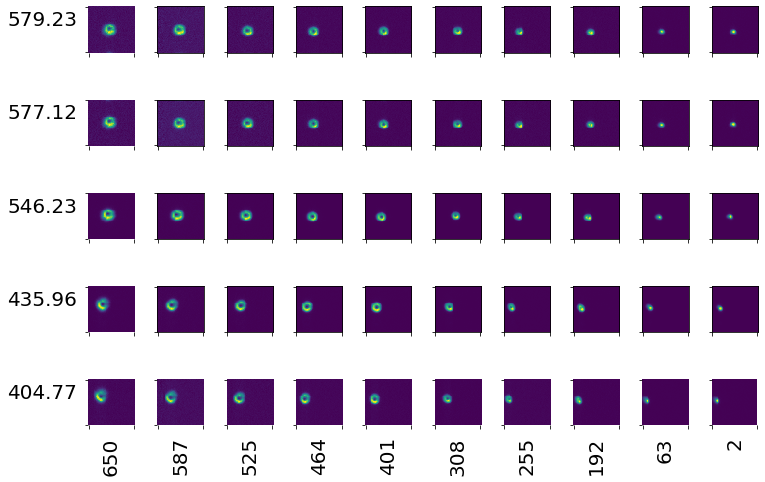

In [19]:
plotRoiPeak(calExp.image.array, selected_peaks, raw=True, roi_size=50)